# Анализ полифакторных ЧС в Волгоградской области
Рудницкий С.Ф.

## Загружаем данные, готовим датасет

In [1]:
#!pip install openpyxl

In [76]:
#!pip install geopy

     ------------------------------------ 118.9/118.9 kB 987.5 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import os, math
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})
import datetime as dt
import requests as req
from urllib3.exceptions import InsecureRequestWarning

from geopy.geocoders import Nominatim

In [2]:
Months = ['янв', 'фев', 'мар', 'апр', 'май', 'июн', 'июл', 'авг', 'сен', 'окт', 'ноя', 'дек']

In [3]:
col_names = ['cdPn', 'cgPn', 'hrId', 'name', 'type', 'ierId', 'level', 'point', 'state', 'action', 'cardId', 'isNear', 'region',
             'ierType', 'cityCode', 'isDanger', 'isDangerB', 'regionId', 'cityFiasId', 'isBlocking', 'isMalicius', 'lostNumber',
             'membership', 'streetCode', 'timeIsoStr', 'isChemFlood', 'dispatchesId', 'districtCode', 'streetFiasId', 
             'clarification', 'injuredNumber', 'responseStatus', 'actionTimeIsoStr', 'assignTimeIsoStr']
col_names1 = ['cdPn', 'hrId', 'name', 'type', 'ierId', 'level', 'point', 'state', 'action', 'cardId', 'isNear', 'region',
             'ierType', 'cityCode', 'isDanger', 'isDangerB', 'regionId', 'cityFiasId', 'isBlocking', 'isMalicius', 'lostNumber',
             'membership', 'streetCode', 'timeIsoStr', 'isChemFlood', 'dispatchesId', 'districtCode', 'streetFiasId', 
             'clarification', 'injuredNumber', 'responseStatus', 'actionTimeIsoStr', 'assignTimeIsoStr']
lncn = len(col_names)
lncn1 = len(col_names1)

In [4]:
def get_month_hrId(cell):
    r = cell.split("_")
    if r[0] != 'EHM' and r[0] != 'EHM1':
        name_month = r[0][:3] 
    else:
        name_month = r[1][:3] 
    return Months.index(name_month)+1

In [5]:
def get_day_hrId(cell):
    r = cell.split("_")
    if r[0] != 'EHM' and r[0] != 'EHM1':
        num_day = r[0][3:]
    else:
        num_day = r[1][3:]
    return int(num_day)

In [6]:
def get_ehm1_hrId(cell):
    r = cell.split("_")
    if r[0] == 'EHM':
        return 1
    if r[0] == 'EHM1':
        return 2
    else:
        return 0

```
01-06.2020 (1).xlsx

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448378 entries, 0 to 448377
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cdPn                     448378 non-null  object  Код телефона
 1   cgPn                     448378 non-null  object  Номер телефона
 2   hrId                     448378 non-null  object  Идентификатор вызова (пример: EHM1_янв01_СлучНабор_184) - доработать
 3   name                     448378 non-null  object  Название вызова (расшифровка вызова) - закодировать
 4   type                     448378 non-null  object  Тип вызова - закодировать
 5   ierId                    448378 non-null  object  Идентификатор обращения
 6   level                    448378 non-null  object  Уровень
 7   point                    448378 non-null  object  Координаты вызова
 8   state                    448378 non-null  object  Статус 
 9   action                   448378 non-null  object  Действие
 10  cardId                   448378 non-null  object  Идентификатор карточки
 11  isNear                   448378 non-null  object  Рядом или нет?
 12  region                   448378 non-null  object  Район
 13  ierType                  448378 non-null  object  Тип обращения            
 14  cityCode                 448378 non-null  object  Код города
 15  isDanger                 448378 non-null  object  Опасность (?)
 16  isDangerB                448378 non-null  object  Опасность (булевое значение)
 17  regionId                 448378 non-null  object  Идентификатор региона
 18  cityFiasId               448378 non-null  object  Id города
 19  isBlocking               448378 non-null  object  Что-то с блокировкой
 20  isMalicius               448378 non-null  object  Что-то с повреждениями
 21  lostNumber               448378 non-null  object  Количество погибших
 22  membership               448378 non-null  object  Назначенные ДДС
 23  streetCode               448378 non-null  object  Код улицы
 24  timeIsoStr               448378 non-null  object  Дата
 25  isChemFlood              448378 non-null  object 
 26  dispatchesId             448378 non-null  object 
 27  districtCode             448378 non-null  object  Код района
 28  streetFiasId             448378 non-null  object  Id улицы
 29  clarification            448378 non-null  object 
 30  injuredNumber            448378 non-null  object  Количество пострадавших
 31  responseStatus           448378 non-null  object 
 32  actionTimeIsoStr         448378 non-null  object  Время действия
 33  assignTimeIsoStr         448378 non-null  object 
 34  acceptOperatorFio        448378 non-null  object  ФИО оператора
 35  acceptOperatorStr        448378 non-null  object  Номер оператора
 36  Unnamed: 36              0 non-null       float64 Убрать эту колонку
 37  Unnamed: 37              0 non-null       float64 Убрать эту колонку
 38  Unnamed: 38              0 non-null       float64 Убрать эту колонку
 39  Unnamed: 39              1 non-null       object  Убрать эту колонку
``` 

In [7]:
df = None
p = os.path.dirname('./content/')
for f in os.listdir(p):
    print(os.path.join(p, f))
    if not f.endswith('.xlsx') : continue
    if f == '01-06.2020 (1).xlsx':
        df1 = pd.read_excel(os.path.join(p, f))
        df1 = df1.drop(index=[0,1], axis=0)
        df1 = df1.drop(df1.columns[[34, 35, 36, 37, 38, 39]], axis=1) 
        df1.columns = col_names  
        df1['Год'] = 2020
        df1['Месяц'] = df1['hrId'].map(get_month_hrId)
        df1['День'] = df1['hrId'].map(get_day_hrId)
        df1['EHM'] = df1['hrId'].map(get_ehm1_hrId)        
        df1 = df1.drop('cgPn', axis=1) 
#        print(df_.info(verbose=True))
#        print(df_.head())
    if f == '01-06.2021 (1).xlsx':    
        df2 = pd.read_excel(os.path.join(p, f))
        df2 = df2.drop(index=[0,1], axis=0)
        df2 = df2.drop(df2.columns[[33, 34, 35, 36, 37]], axis=1) 
        df2.columns = col_names1  
        df2['Год'] = 2021
        df2['Месяц'] = df2['hrId'].map(get_month_hrId)
        df2['День'] = df2['hrId'].map(get_day_hrId)
        df2['EHM'] = df2['hrId'].map(get_ehm1_hrId)        
        #print(df2.info(verbose=True))
        #print(df2.head())
    if f == '01-09.2019 (1).xlsx':
        df3 = pd.read_excel(os.path.join(p, f))
        df3 = df3.drop(index=[0,1], axis=0)
        df3 = df3.drop(df3.columns[[34, 35, 36, 37]], axis=1) 
        df3.columns = col_names  
        df3 = df3.drop('cgPn', axis=1) 
        df3['Год'] = 2019
        df3['Месяц'] = df3['hrId'].map(get_month_hrId)
        df3['День'] = df3['hrId'].map(get_day_hrId)
        df3['EHM'] = df3['hrId'].map(get_ehm1_hrId)        
        #print(df3.info(verbose=True))
        #print(df3.head())
    if f == '07-12.2020 (1).xlsx':
        df4 = pd.read_excel(os.path.join(p, f))
        df4 = df4.drop(index=[0,1], axis=0)
        df4 = df4.drop(df4.columns[[33, 34, 35, 36]], axis=1) 
        df4.columns = col_names1    
        df4['Год'] = 2020
        df4['Месяц'] = df4['hrId'].map(get_month_hrId)
        df4['День'] = df4['hrId'].map(get_day_hrId)
        df4['EHM'] = df4['hrId'].map(get_ehm1_hrId)        
        #print(df4.info(verbose=True))
        #print(df4.head())
    if f == '07-12.2021 (1).xlsx':  
        df5 = pd.read_excel(os.path.join(p, f))
        df5 = df5.drop(index=[0,1], axis=0)
        df5 = df5.drop(df5.columns[[33, 34, 35]], axis=1) 
        df5.columns = col_names1    
        df5['Год'] = 2021
        df5['Месяц'] = df5['hrId'].map(get_month_hrId)
        df5['День'] = df5['hrId'].map(get_day_hrId)
        df5['EHM'] = df5['hrId'].map(get_ehm1_hrId)        
        #print(df5.info(verbose=True))
        #print(df5.head())
    if f == '10-12.2019 (1).xlsx':
        df6 = pd.read_excel(os.path.join(p, f))
        df6 = df6.drop(index=[0,1], axis=0)
        df6 = df6.drop(df6.columns[[34, 35, 36]], axis=1) 
        df6.columns = col_names    
        df6 = df6.drop('cgPn', axis=1) 
        df6['Год'] = 2019
        df6['Месяц'] = df6['hrId'].map(get_month_hrId)
        df6['День'] = df6['hrId'].map(get_day_hrId)
        df6['EHM'] = df6['hrId'].map(get_ehm1_hrId)        
        #print(df6.head())
    #df = df_ if df is None else pd.concat([df, df_], axis=0, ignore_index=True)
    #print(df.info())
#df.to_csv('./content/full_data.csv', sep=';', encoding='utf-8')
#df.info()

./content\01-06.2020 (1).xlsx
./content\01-06.2021 (1).xlsx
./content\01-09.2019 (1).xlsx
./content\07-12.2020 (1).xlsx
./content\07-12.2021 (1).xlsx
./content\10-12.2019 (1).xlsx


In [8]:
df = pd.concat([df1, df2, df3, df4, df5, df6 ], axis=0, ignore_index=True)

In [10]:
df.tail()

,cdPn,hrId,name,type,ierId,level,point,state,action,cardId,...,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM
2517854,,EHM1_дек18_Молчание_342,Вызов с молчанием ...,Вызов с молчанием ...,,Обычный,"[{""lat"": 48.715, ""lon"": 44.5258}] ...",Карточка закрыта,,eaaa1dac-a35c-4732-92de-ab2700b5616f,...,,,0,200.0,,,2019,12,18,2
2517855,,EHM1_дек17_Оказани_486,Оказание медицинской помощи ...,Оказание медицинской помощи ...,,Обычный,"[{""lat"": 48.4395, ""lon"": 44.4376}] ...",Карточка закрыта,,5979084d-5e62-4a1a-91c5-ab26017488fa,...,,,0,200.0,,2019-12-17T22:37:14.000,2019,12,17,2
2517856,,EHM1_дек18_Оказани_122,Оказание медицинской помощи ...,Оказание медицинской помощи ...,,Обычный,"[{""lat"": 50.1105, ""lon"": 45.4226}] ...",Все реагирования завершены,,f51d9497-5f4a-4870-be06-ab27009431e8,...,,,0,200.0,,2019-12-18T08:59:38.000,2019,12,18,2
2517857,,EHM1_дек13_Молчание_032,Вызов с молчанием ...,Вызов с молчанием ...,,Обычный,"[{""lat"": 50.2237829922196, ""lon"": 43.448587056...",Карточка закрыта,,9e53b607-1fed-40d3-80db-ab22002c929f,...,,,0,200.0,,,2019,12,13,2
2517858,,EHM1_окт01_не_задано_004,не задано ...,не задано ...,,Обычный,...,Назначена в ДДС,,13c1d147-c48d-417b-9c84-aad9000b7033,...,,,0,200.0,,2019-10-01T00:41:38.000,2019,10,1,2


In [2]:
df.to_csv('./content/full_data.csv', sep=';', encoding='utf-8')

NameError: name 'df' is not defined

In [3]:
df = pd.read_csv('./content/full_data.csv', sep=';', encoding='utf-8', low_memory=False)

C:\Users\Сергей\AppData\Local\Temp\ipykernel_21904\2604846812.py:1: DtypeWarning: Columns (30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./content/full_data.csv', sep=';', encoding='utf-8')


In [17]:
df.shape

(2517859, 37)

In [34]:
df = df.drop('Unnamed: 0', axis=1) # когда загружал, забыл указать index=False, вот теперь приходится лишнюю колонку удалять

## Анализируем типы бесполезных вызовов

In [11]:
df_name = df[['name', 'type']].value_counts()

name                                                                                 type                                                                               
Вызов с молчанием                                                                    Вызов с молчанием                                                                      541042
Оказание медицинской помощи                                                          Оказание медицинской помощи                                                            523944
Случайный набор номера                                                               Случайный набор номера                                                                 357769
Прерывание вызова звонящим сразу после подключения                                   Прерывание вызова звонящим сразу после подключения                                     240866
Получение справок                                                                    Получение справок             

In [10]:
df_name.to_excel('./reports/name.xlsx')

Анализ уникальных значений пар в колонках 'name' и 'type' показывает, что эти 2 колонки идентичны, поэтому можно оставить только одну, оставим колонку 'type' и сохраним уникальные значения типов в файл:

In [14]:
df = df.drop('name', axis=1) 

In [15]:
df_name = df[['type']].value_counts()
df_name.to_excel('./reports/type.xlsx')

Посмотрим первые 20 типов вызовов:

In [16]:
df_name.head(20)

type                                                                               
Вызов с молчанием                                                                      541042
Оказание медицинской помощи                                                            523944
Случайный набор номера                                                                 357769
Прерывание вызова звонящим сразу после подключения                                     240866
Получение справок                                                                      148917
Правонарушение                                                                         125303
Автоматические ложные вызовы                                                            67116
Детские шалости                                                                         59040
ДТП                                                                                     54844
Неправильное понимание экстренной ситуации                            

Рассмотрим поподробнее 'Вызов с молчанием' (20%), похоже, по ним по определению не может предприниматься каких-либо действий.  

In [27]:
pd.set_option('display.max_columns', None)

In [33]:
df_type0 = df.loc[df['type']=='Вызов с молчанием']
df_type0.head()

,Unnamed: 0,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM


Вот те раз! Похоже, в названии типа имеются пробелы справа, сколько, неизвестно, придется их обрезать.

In [35]:
df['type'] = df['type'].str.rstrip()

Пробуем еще раз:

In [36]:
df_type0 = df.loc[df['type']=='Вызов с молчанием']
df_type0.head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM
0,[NULL],янв14_Молчание_488,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.7458, ""lon"": 44.816}] ...",Карточка закрыта,[NULL],5c2b8b11-f56a-46cf-a86f-ab4201016101,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-14T15:37:05.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,14,0
1,[NULL],янв15_Молчание_418,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.4808, ""lon"": 45.046}] ...",Карточка закрыта,[NULL],7176c1b6-de84-42d7-aa1e-ab4300ce8947,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-15T12:31:58.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,15,0
2,[NULL],янв16_Молчание_138,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.7757, ""lon"": 44.8021}] ...",Карточка закрыта,[NULL],43f3339b-e832-493b-8d46-ab440091c61d,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-16T08:50:44.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,16,0
3,[NULL],янв17_Молчание_145,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.513, ""lon"": 44.5205}] ...",Карточка закрыта,[NULL],bb28b388-fbfa-42c5-8762-ab4500962c90,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-17T09:06:46.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,17,0
4,[NULL],янв18_Молчание_174,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 50.0817, ""lon"": 45.4133}] ...",Карточка закрыта,[NULL],adf5ec1b-5c95-492a-9fcb-ab4600aba7ee,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-18T10:24:58.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,18,0


Вот это другое дело. Что полезного можно извлечь из данных о вызовах с молчанием. Можно проанализировать локации (point), из которых чаще всего происходят такие вызовы. Можно определить время, в которое чаще всего происходят такие вызовы (timeIsoStr) и регион (region). Возможно, мы это и сделаем, но попозже, поскольку Случайный набор номера или Прерывание вызова звонящим сразу после подключения тоже не несут в себе ничего полезного.

In [37]:
df.loc[df['type']=='Случайный набор номера'].head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM
22,[NULL],EHM1_янв01_СлучНабор_184,Случайный набор номера,[NULL],Обычный,"[{""lat"": 50.8711, ""lon"": 44.8114}] ...",Карточка закрыта,[NULL],9466d832-69bb-449a-9273-ab3500b1ebab,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-01T10:47:47.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,1,2
26,[NULL],EHM1_янв13_СлучНабор_079,Случайный набор номера,[NULL],Обычный,"[{""lat"": 50.0633, ""lon"": 43.2439}] ...",Карточка закрыта,[NULL],66d347f2-c2e7-4765-a9fb-ab41009de4c2,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-13T09:34:52.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,13,2
30,[NULL],EHM1_янв13_СлучНабор_080,Случайный набор номера,[NULL],Обычный,"[{""lat"": 48.7686, ""lon"": 44.5507}] ...",Карточка закрыта,[NULL],1932a84c-091d-4e18-a957-ab41009e1f63,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-13T09:35:42.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,13,2
46,[NULL],янв16_СлучНабор_272,Случайный набор номера,[NULL],Обычный,"[{""lat"": 48.707103, ""lon"": 44.516939}] ...",Карточка закрыта,[NULL],82d1c160-ecda-4fe1-bdee-ab4400e7fe2b,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-16T14:04:39.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,16,0
52,[NULL],EHM1_янв13_СлучНабор_085,Случайный набор номера,[NULL],Обычный,"[{""lat"": 50.113, ""lon"": 45.696}] ...",Карточка закрыта,[NULL],59e93581-cc23-4ac6-bff9-ab41009f5618,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-13T09:40:07.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,13,2


In [38]:
df.loc[df['type']=='Прерывание вызова звонящим сразу после подключения'].head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM
27,[NULL],EHM1_янв02_ПрерывСвяз_073,Прерывание вызова звонящим сразу после подключ...,[NULL],Обычный,"[{""lat"": 49.5778, ""lon"": 42.7266}] ...",Карточка закрыта,[NULL],6ff70be1-8969-41c5-9885-ab3600ac646f,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-02T10:27:39.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,2,2
37,[NULL],EHM1_янв01_ПрерывСвяз_138,Прерывание вызова звонящим сразу после подключ...,[NULL],Обычный,"[{""lat"": 49.7825, ""lon"": 43.9946}] ...",Карточка закрыта,[NULL],68dae9fa-e9a9-4865-92b4-ab3500b2379e,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-01T10:48:52.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,1,2
41,[NULL],EHM1_янв01_ПрерывСвяз_137,Прерывание вызова звонящим сразу после подключ...,[NULL],Обычный,"[{""lat"": 49.7644, ""lon"": 45.4017}] ...",Карточка закрыта,[NULL],0debcd47-84b5-41f4-8a9c-ab3500b2028e,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-01T10:48:06.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,1,2
42,[NULL],EHM1_янв13_ПрерывСвяз_073,Прерывание вызова звонящим сразу после подключ...,[NULL],Обычный,"[{""lat"": 48.5119, ""lon"": 44.5475}] ...",Карточка закрыта,[NULL],681f9213-66bf-4b60-b1e9-ab41009dee47,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-13T09:35:00.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,13,2
43,[NULL],EHM1_янв13_ПрерывСвяз_074,Прерывание вызова звонящим сразу после подключ...,[NULL],Обычный,"[{""lat"": 50.0709, ""lon"": 43.2239}] ...",Карточка закрыта,[NULL],f1cdc53c-c328-4675-b1f3-ab41009e255b,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-13T09:35:47.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,13,2


Имеет смысл выделить все такие звонки в группу бесполезных/вредных звонков. Для этого зайдем в ранее выгруженный файл type.xlsx, добавим колонку 'group' (группа) и для звонков типа вызов с молчанием проставим 0 (конечно, выбор слегка субъективный, но для быстро убывающего хвоста даже несколько десятков ошибочно атрибутированных типов вызова - не принципиально.) И да, файл type.xlsx нужно еще раз повторно выгрузить, теперь, когда нет замыкающих пробелов. 

In [40]:
df_name = df[['type']].value_counts()
df_name.to_excel('./reports/type.xlsx')

Заинтересовал тип 'Автоматические ложные вызовы', можно ли их отнести к бесполезным/вредным?

In [41]:
df.loc[df['type']=='Автоматические ложные вызовы'].head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM
25,[NULL],EHM1_янв03_ЛожнАвтом_019,Автоматические ложные вызовы,[NULL],Обычный,"[{""lat"": 48.7527, ""lon"": 44.5109}] ...",Карточка закрыта,[NULL],f7417b5b-dfae-4da0-9ad2-ab370017fe59,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-03T01:27:21.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,3,2
39,[NULL],янв14_ЛожнАвтом_126,Автоматические ложные вызовы,[NULL],Обычный,"[{""lat"": 50.9437, ""lon"": 44.7738}] ...",Карточка закрыта,[NULL],a8f5b35b-c7e5-46ff-b2e6-ab42010fa4ae,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-14T16:29:01.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,14,0
164,[NULL],янв30_ЛожнАвтом_095,Автоматические ложные вызовы,[NULL],Обычный,"[{""lat"": 48.7675, ""lon"": 44.8028}] ...",Карточка закрыта,[NULL],d4346767-df9c-47bb-acc0-ab5200f1b489,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-30T14:40:01.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,30,0
173,[NULL],янв31_ЛожнАвтом_015,Автоматические ложные вызовы,[NULL],Обычный,"[{""lat"": 48.6272, ""lon"": 42.803}] ...",Карточка закрыта,[NULL],4f4a4b93-4551-43dc-bd49-ab530046a036,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-31T04:17:08.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,31,0
181,[NULL],фев02_ЛожнАвтом_010,Автоматические ложные вызовы,[NULL],Обычный,"[{""lat"": 48.4879726013908, ""lon"": 44.606706012...",Карточка закрыта,[NULL],40273a35-97c9-4bd6-b264-ab55004fc8a9,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-02-02T04:50:29.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,2,2,0


Да, похоже, что можно. По ним тоже ничего не делается, кроме регистрации. То же насчет 'Неправильное понимание экстренной ситуации'.

In [42]:
df.loc[df['type']=='Неправильное понимание экстренной ситуации'].head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM
23,[NULL],EHM1_янв01_НепрПоним_050,Неправильное понимание экстренной ситуации,[NULL],Обычный,"[{""lat"": 50.1197, ""lon"": 45.423}] ...",Карточка закрыта,[NULL],cb324777-cc7a-4980-b164-ab3500fa8ba0,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-01T15:12:12.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,1,2
29,[NULL],EHM1_янв05_НепрПоним_011,Неправильное понимание экстренной ситуации,[NULL],Обычный,"[{""lat"": 50.1027, ""lon"": 45.4336}] ...",Карточка закрыта,[NULL],f5542cf4-a34d-4b8e-90e5-ab3900a9cf43,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-05T10:18:15.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,5,2
31,[NULL],EHM1_янв13_НепрПоним_027,Неправильное понимание экстренной ситуации,[NULL],Обычный,"[{""lat"": 48.5168, ""lon"": 44.5824}] ...",Карточка закрыта,[NULL],23ad33ef-7713-4551-964f-ab41009de46d,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-13T09:34:52.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,13,2
182,[NULL],янв31_НепрПоним_005,Неправильное понимание экстренной ситуации,[NULL],Обычный,"[{""lat"": 48.7783, ""lon"": 44.7547}] ...",Карточка закрыта,[NULL],909fe109-2963-4f2d-8f21-ab53009963a5,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-31T09:18:28.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,31,0
218,[NULL],фев14_НепрПоним_046,Неправильное понимание экстренной ситуации,[NULL],Обычный,"[{""lat"": 48.7692, ""lon"": 44.5564}] ...",Карточка закрыта,[NULL],050da7be-8a61-4afa-b04d-ab610154ee23,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-02-14T20:41:17.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,2,14,0


In [ ]:
Любопытно, как обрабатывают вызовы, обозначаемые как 'Психически неуравновешенные люди'?

In [43]:
df.loc[df['type']=='Психически неуравновешенные люди'].head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM
111,[NULL],янв23_ПсихНеуравн_024,Психически неуравновешенные люди,[NULL],Обычный,"[{""lat"": 48.7858825923323, ""lon"": 44.567704774...",Карточка закрыта,[NULL],cb6dcad3-8612-409f-bb9b-ab4b0043e268,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-23T04:07:09.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,23,0
130,[NULL],янв24_ПсихНеуравн_003,Психически неуравновешенные люди,[NULL],Обычный,"[{""lat"": 50.0882, ""lon"": 45.3564}] ...",Карточка закрыта,[NULL],493500a1-1005-432b-94cc-ab4c001a1069,[NULL],Волгоград Ворошиловский,[NULL],[NULL],[NULL],false,10,[NULL],false,[NULL],0,...,[NULL],2020-01-24T01:34:53.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,24,0
141,[NULL],янв29_ПсихНеуравн_079,Психически неуравновешенные люди,[NULL],Обычный,"[{""lat"": 48.707103, ""lon"": 44.516939}] ...",Карточка закрыта,[NULL],075d1f86-f3b2-450a-8eaf-ab5100abb43b,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-29T10:25:09.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,29,0
174,[NULL],янв29_ПсихНеуравн_083,Психически неуравновешенные люди,[NULL],Обычный,"[{""lat"": 48.7927, ""lon"": 44.5804}] ...",Карточка закрыта,[NULL],659c45b4-4b9b-451c-b9c7-ab5100d65e81,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-29T13:00:29.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,29,0
603,[NULL],янв29_ПсихНеуравн_084,Психически неуравновешенные люди,[NULL],Обычный,"[{""lat"": 48.7927, ""lon"": 44.5804}] ...",Карточка закрыта,[NULL],17c0cbe3-1752-43b8-9692-ab5100d7c34c,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-29T13:05:34.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,29,0


Так же, значит, для них тоже группа 0. Остались только 'Оскорбительные вызовы' и 'Злонамеренные вызовы'.

In [44]:
df.loc[df['type']=='Оскорбительные вызовы'].head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM
2632,[NULL],EHM1_янв02_Оскорблен_002,Оскорбительные вызовы,[NULL],Обычный,"[{""lat"": 50.0426, ""lon"": 42.4593}] ...",Карточка закрыта,[NULL],022b1204-bd53-4ace-9aab-ab36010346ae,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-02T15:43:59.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,2,2
3247,[NULL],EHM1_янв01_Оскорблен_006,Оскорбительные вызовы,[NULL],Обычный,"[{""lat"": 48.7118, ""lon"": 44.3577}] ...",Карточка закрыта,[NULL],2f6482eb-afe7-4f16-a4c5-ab350166bcc8,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-01T21:46:07.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,1,2
6799,[NULL],фев26_Оскорблен_001,Оскорбительные вызовы,[NULL],Обычный,"[{""lat"": 51.063, ""lon"": 42.4249}] ...",Карточка закрыта,[NULL],065d1476-c9b1-4331-ab15-ab6d001fe7c9,[NULL],Волгоград Ворошиловский,[NULL],[NULL],[NULL],false,10,[NULL],false,[NULL],0,...,[NULL],2020-02-26T01:56:09.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,2,26,0
8386,[NULL],янв24_Оскорблен_002,Оскорбительные вызовы,[NULL],Обычный,"[{""lat"": 50.0882, ""lon"": 45.3564}] ...",Карточка закрыта,[NULL],0d3c0106-6741-4a2c-95db-ab4c001d1e7f,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-24T01:46:01.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,24,0
9712,[NULL],EHM1_янв06_Оскорблен_001,Оскорбительные вызовы,[NULL],Обычный,"[{""lat"": 50.57, ""lon"": 44.0339}] ...",Карточка закрыта,[NULL],1fe915a0-38a8-423d-9187-ab3a0166ea4e,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-06T21:46:46.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,6,2


In [45]:
df.loc[df['type']=='Злонамеренные вызовы'].head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM
1235,[NULL],янв25_Злонамер_004,Злонамеренные вызовы,[NULL],Обычный,"[{""lat"": 48.7636, ""lon"": 44.8066}] ...",Карточка закрыта,[NULL],96910759-ac0b-469d-a01e-ab4d01120b80,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-25T16:37:46.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,25,0
1247,[NULL],янв25_Злонамер_005,Злонамеренные вызовы,[NULL],Обычный,"[{""lat"": 48.7686, ""lon"": 44.7936}] ...",Карточка закрыта,[NULL],72de843c-713f-453d-90f5-ab4d011291b2,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-25T16:39:40.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,25,0
2131,[NULL],EHM1_янв05_Злонамер_003,Злонамеренные вызовы,[NULL],Обычный,"[{""lat"": 48.707103, ""lon"": 44.516939}] ...",Карточка закрыта,[NULL],22fee840-3842-4ebe-82fe-ab3900c35244,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-05T11:51:08.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,5,2
2513,[NULL],янв15_Злонамер_003,Злонамеренные вызовы,[NULL],Обычный,"[{""lat"": 48.6971, ""lon"": 43.521}] ...",Карточка закрыта,[NULL],adc7811a-44df-41b7-ab9f-ab43016571f3,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-15T21:41:25.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,15,0
2688,[NULL],янв24_Злонамер_012,Злонамеренные вызовы,[NULL],Обычный,"[{""lat"": 48.7784, ""lon"": 44.4792}] ...",Карточка закрыта,[NULL],c7f6e423-0b0a-421a-8fd7-ab4c005b8c2e,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-24T05:33:18.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,24,0


В результате получаем, что к группе 0 относятся:

In [50]:
df_type = pd.read_excel('./reports/type.xlsx')
df_type = df_type.loc[df_type['group'] == 0]
df_type.head(7)

,type,qty,group
0,Вызов с молчанием,546797,0.0
2,Случайный набор номера,361236,0.0
7,Детские шалости,59615,0.0
10,Психически неуравновешенные люди,29287,0.0
16,Неправильный набор номера (ошибочный),14098,0.0
48,Оскорбительные вызовы,1632,0.0
49,Злонамеренные вызовы,1516,0.0


Количество таких записей составляет: 

In [52]:
s0 = df_type['qty'].sum()
s0

1014181

In [ ]:
т.е.

In [53]:
s0/df.shape[0]*100

40.27949936831252

40% (!) бесполезных вызовов. С этим нужно что-то делать... Например, определим локации с наибольшим количеством таких вызовов, прежде присвоив таким вызовам группу 0

In [55]:
mapping = df_type.set_index('type')['group']
mapping

type
Вызов с молчанием                        0.0
Случайный набор номера                   0.0
Детские шалости                          0.0
Психически неуравновешенные люди         0.0
Неправильный набор номера (ошибочный)    0.0
Оскорбительные вызовы                    0.0
Злонамеренные вызовы                     0.0
Name: group, dtype: float64

In [63]:
df_type1 = df_type.assign(group = df_type['type'].map(mapping))
df_type1.columns

Index(['type', 'qty', 'group'], dtype='object')

In [64]:
df = df.assign(group = df['type'].map(mapping))

In [66]:
df_group0 = df.loc[df['group']==0]
df_group0.head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM,group
0,[NULL],янв14_Молчание_488,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.7458, ""lon"": 44.816}] ...",Карточка закрыта,[NULL],5c2b8b11-f56a-46cf-a86f-ab4201016101,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-14T15:37:05.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,14,0,0.0
1,[NULL],янв15_Молчание_418,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.4808, ""lon"": 45.046}] ...",Карточка закрыта,[NULL],7176c1b6-de84-42d7-aa1e-ab4300ce8947,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-15T12:31:58.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,15,0,0.0
2,[NULL],янв16_Молчание_138,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.7757, ""lon"": 44.8021}] ...",Карточка закрыта,[NULL],43f3339b-e832-493b-8d46-ab440091c61d,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-16T08:50:44.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,16,0,0.0
3,[NULL],янв17_Молчание_145,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.513, ""lon"": 44.5205}] ...",Карточка закрыта,[NULL],bb28b388-fbfa-42c5-8762-ab4500962c90,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-17T09:06:46.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,17,0,0.0
4,[NULL],янв18_Молчание_174,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 50.0817, ""lon"": 45.4133}] ...",Карточка закрыта,[NULL],adf5ec1b-5c95-492a-9fcb-ab4600aba7ee,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-18T10:24:58.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,18,0,0.0


In [68]:
df['point'] = df['point'].str.rstrip()

In [83]:
def get_point_lat(cell):
    r = cell.split(", ")
    if len(r) == 2:
        return r[0].split(' ')[1]
    else:
        return ''

In [84]:
def get_point_lon(cell):
    r = cell.split(", ")
    if len(r) == 2:
        return r[1].split(' ')[1][:-2]
    else:
        return ''

In [89]:
df_group0['point_lat'] = df_group0['point'].map(get_point_lat)
df_group0['point_lon'] = df_group0['point'].map(get_point_lon)

C:\Users\Сергей\AppData\Local\Temp\ipykernel_21904\1868735511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group0.loc[:,'point_lat'] = df_group0['point'].map(get_point_lat)
C:\Users\Сергей\AppData\Local\Temp\ipykernel_21904\1868735511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group0.loc[:,'point_lon'] = df_group0['point'].map(get_point_lon)


In [86]:
df_group0.head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM,group,point_lat,point_lon
0,[NULL],янв14_Молчание_488,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.7458, ""lon"": 44.816}] ...",Карточка закрыта,[NULL],5c2b8b11-f56a-46cf-a86f-ab4201016101,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-14T15:37:05.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,14,0,0.0,48.7458,44.816
1,[NULL],янв15_Молчание_418,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.4808, ""lon"": 45.046}] ...",Карточка закрыта,[NULL],7176c1b6-de84-42d7-aa1e-ab4300ce8947,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-15T12:31:58.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,15,0,0.0,48.4808,45.046
2,[NULL],янв16_Молчание_138,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.7757, ""lon"": 44.8021}] ...",Карточка закрыта,[NULL],43f3339b-e832-493b-8d46-ab440091c61d,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-16T08:50:44.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,16,0,0.0,48.7757,44.8021
3,[NULL],янв17_Молчание_145,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.513, ""lon"": 44.5205}] ...",Карточка закрыта,[NULL],bb28b388-fbfa-42c5-8762-ab4500962c90,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-17T09:06:46.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,17,0,0.0,48.513,44.5205
4,[NULL],янв18_Молчание_174,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 50.0817, ""lon"": 45.4133}] ...",Карточка закрыта,[NULL],adf5ec1b-5c95-492a-9fcb-ab4600aba7ee,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-18T10:24:58.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,18,0,0.0,50.0817,45.4133


In [87]:
df_group0[['point_lat', 'point_lon']].value_counts()

point_lat         point_lon       
48.707103         44.516939           68760
50.9849969392598  44.7793782917138     5356
50.0712           45.3843              4558
48.6321           44.4407              3173
48.8286           44.7603              2583
                                      ...  
48.7846           44.5859                 1
                  44.5845                 1
                  44.5843                 1
                  44.5838                 1
60.0477           30.4643                 1
Length: 188393, dtype: int64

In [88]:
geolocator = Nominatim(user_agent="geoapiExercises")

Latitude = '48.707103'
Longitude = '44.516939'
 
location = geolocator.geocode(Latitude+","+Longitude)
print(f"Адрес: {location}")

Адрес: проспект Ленина, Центральный район, Волгоград, городской округ Волгоград, Волгоградская область, Южный федеральный округ, 400066, Россия


In [ ]:
Интересно... По этому адресу находится администрация Центрального района Волгограда. Количество таких звонков составляет:

In [90]:
68760/1014181*100

6.77985487797543

почти 7%! Возможно, есть какая-то специфика в вызовах с этого адреса. Посмотрим на следующую по частоте локацию:

In [92]:
geolocator = Nominatim(user_agent="geoapiExercises")

Latitude = '50.9849969392598'
Longitude = '44.7793782917138'
 
location = geolocator.geocode(Latitude+","+Longitude)
print(f"Адрес: {location}")

Latitude = '50.0712'
Longitude = '45.3843'

location = geolocator.geocode(Latitude+","+Longitude)
print(f"Адрес: {location}")

Адрес: 5, Жирновская улица, Жирновск, Жирновское городское поселение, Жирновский район, Волгоградская область, Южный федеральный округ, 403791, Россия
Адрес: 155, улица Гагарина, Камышин, Волгоградская область, Южный федеральный округ, 403895, Россия


В общем, не совсем понятно, что это, но можно продолжить в таком же духе.

In [ ]:
Исключительно из занудства посмотрим, как распределяются бесполезные вызовы по регионам:

In [95]:
df_group0[['region']].value_counts()

region                     
Волгоград Ворошиловский        571202
Волгоград                      328245
Волжский                        23744
Жирновский                      14261
Михайловский                     6357
Серафимовичский                  6267
Урюпинский                       5464
Камышинский                      5354
Волгоград Дзержинский            4221
Волгоград Красноармейский        4008
Котовский                        3549
Волгоград Краснооктябрьский      3413
Волгоград Центральный            3405
Волгоград Тракторозаводский      3390
Волгоград Советский              2937
Ленинский                        2769
Еланский                         2524
Волгоград Кировский              2269
Городищенский                    1863
Среднеахтубинский                1677
Фроловский                       1528
Калачевский                      1498
Даниловский                      1380
Дубовский                        1248
Суровикинский                    1047
Светлоярский          

Ворошиловский район - рулит, более половины всех таких вызовов:

In [96]:
571202/1014181*100

56.32150474126413

а если добавить все, что связано с Волгоградом, то получим вообще 90% всех бесполезных вызовов:

In [97]:
(571202+328245+4221+4008+3413+3405+3390+2937) /1014181*100

90.7945425915098

In [ ]:
Впрочем, это довольно очевидная и бесполезная информация...

## Работаем с типами направлений чрезвычайных ситуаций: ЧС на транспорте (группа 1)

Аналогичным образом разнесем на группы и другие типы вызовов. Но прежде сделаем в рассматриваемом датасете два поля 'point_lat' и 'point_lon', вдруг тоже понадобится узнать, что находится по этим адресам.

In [93]:
df['point_lat'] = df['point'].map(get_point_lat)
df['point_lon'] = df['point'].map(get_point_lon)

In [94]:
df.head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM,group,point_lat,point_lon
0,[NULL],янв14_Молчание_488,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.7458, ""lon"": 44.816}]",Карточка закрыта,[NULL],5c2b8b11-f56a-46cf-a86f-ab4201016101,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-14T15:37:05.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,14,0,0.0,48.7458,44.816
1,[NULL],янв15_Молчание_418,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.4808, ""lon"": 45.046}]",Карточка закрыта,[NULL],7176c1b6-de84-42d7-aa1e-ab4300ce8947,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-15T12:31:58.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,15,0,0.0,48.4808,45.046
2,[NULL],янв16_Молчание_138,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.7757, ""lon"": 44.8021}]",Карточка закрыта,[NULL],43f3339b-e832-493b-8d46-ab440091c61d,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-16T08:50:44.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,16,0,0.0,48.7757,44.8021
3,[NULL],янв17_Молчание_145,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.513, ""lon"": 44.5205}]",Карточка закрыта,[NULL],bb28b388-fbfa-42c5-8762-ab4500962c90,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-17T09:06:46.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,17,0,0.0,48.513,44.5205
4,[NULL],янв18_Молчание_174,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 50.0817, ""lon"": 45.4133}]",Карточка закрыта,[NULL],adf5ec1b-5c95-492a-9fcb-ab4600aba7ee,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-18T10:24:58.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,18,0,0.0,50.0817,45.4133


Снова смотрим на файл type.xlsx и проставляем в колонку group 1 для тех вызовов, которые, по нашему мнению, связаны с транспортом. Вот что получилось:

In [152]:
df_type = pd.read_excel('./reports/type.xlsx')
df_notna_type = df_type.loc[df_type['group'].notna()]
df_type1 = df_type.loc[df_type['group'] == 1]

In [141]:
df_type1.head(100)

,type,qty,group
8,ДТП,55133,1
31,ДТП с пострадавшими,4291,1
37,Управление транспортным средством в состоянии ...,3062,1
39,Повреждение припаркованного транспортного сред...,2935,1
43,Повреждение транспортного средства,1915,1
44,Наезд на пешехода,1797,1
45,Управление транспортным средством в неадекватн...,1779,1
50,Светофор,1506,1
52,Брошенное транспортное средство,1331,1
55,Наезд на препятствие,1212,1


In [142]:
s1 = df_type1['qty'].sum()
s1p = s1 / (df.shape[0] - s0)
print(f"Группа 1 ЧС на транспорте: всего вызовов {s1} ({s1p:.2f}% от общего полезного количества)")

Группа 1 ЧС на транспорте: всего вызовов 79029 (0.05% от общего полезного количества)


In [114]:
mapping = df_notna_type.set_index('type')['group']
mapping

type
Вызов с молчанием                                                                      0.0
Случайный набор номера                                                                 0.0
Автоматические ложные вызовы                                                           0.0
Детские шалости                                                                        0.0
ДТП                                                                                    1.0
Неправильное понимание экстренной ситуации                                             0.0
Психически неуравновешенные люди                                                       0.0
не задано                                                                              0.0
Неправильный набор номера (ошибочный)                                                  0.0
Управление транспортным средством в состоянии алкогольного/наркотического опьянения    1.0
Повреждение припаркованного транспортного средства                                   

In [115]:
df = df.assign(group = df['type'].map(mapping))

In [116]:
df.head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM,group,point_lat,point_lon
0,[NULL],янв14_Молчание_488,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.7458, ""lon"": 44.816}]",Карточка закрыта,[NULL],5c2b8b11-f56a-46cf-a86f-ab4201016101,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-14T15:37:05.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,14,0,0.0,48.7458,44.816
1,[NULL],янв15_Молчание_418,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.4808, ""lon"": 45.046}]",Карточка закрыта,[NULL],7176c1b6-de84-42d7-aa1e-ab4300ce8947,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-15T12:31:58.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,15,0,0.0,48.4808,45.046
2,[NULL],янв16_Молчание_138,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.7757, ""lon"": 44.8021}]",Карточка закрыта,[NULL],43f3339b-e832-493b-8d46-ab440091c61d,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-16T08:50:44.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,16,0,0.0,48.7757,44.8021
3,[NULL],янв17_Молчание_145,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.513, ""lon"": 44.5205}]",Карточка закрыта,[NULL],bb28b388-fbfa-42c5-8762-ab4500962c90,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-17T09:06:46.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,17,0,0.0,48.513,44.5205
4,[NULL],янв18_Молчание_174,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 50.0817, ""lon"": 45.4133}]",Карточка закрыта,[NULL],adf5ec1b-5c95-492a-9fcb-ab4600aba7ee,[NULL],Волгоград,[NULL],[NULL],[NULL],false,1,[NULL],false,[NULL],0,...,[NULL],2020-01-18T10:24:58.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],[NULL],2020,1,18,0,0.0,50.0817,45.4133


In [117]:
df_group1 = df.loc[df['group']==1]
df_group1.head()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM,group,point_lat,point_lon
78,[NULL],янв17_ДТП_046,ДТП,[NULL],Обычный,"[{""lat"": 48.7563, ""lon"": 44.4954}]",Карточка закрыта,[NULL],50b3452c-4f33-4610-a7df-ab450129a111,[NULL],Волгоград Дзержинский,[NULL],[NULL],[NULL],false,11,[NULL],false,[NULL],0,Полиция: ОП №3 Дзержинский р-н ...,[NULL],2020-01-17T18:03:38.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],2020-01-17T18:03:53.000,2020,1,17,0,1.0,48.7563,44.4954
131,[NULL],янв25_ДТП_061,ДТП,[NULL],Обычный,"[{""lat"": 48.6837, ""lon"": 44.4306}]",Карточка закрыта,[NULL],32206385-2f8c-4f17-a761-ab4d015d7f83,[NULL],Волгоград Советский,[NULL],[NULL],[NULL],false,52,[NULL],false,[NULL],0,Полиция: ОП №6 Советский р-н ...,[NULL],2020-01-25T21:12:29.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],2020-01-25T21:13:14.000,2020,1,25,0,1.0,48.6837,44.4306
156,[NULL],янв28_НаездПеш_001,Наезд на пешехода,[NULL],Обычный,"[{""lat"": 48.723, ""lon"": 44.4852}]",Карточка закрыта,[NULL],878870d7-9112-4fbb-af11-ab5000f24562,[NULL],Волгоград Дзержинский,[NULL],[NULL],[NULL],false,11,[NULL],false,[NULL],0,"Полиция: ОП №3 Дзержинский р-н, ЕДДС: ОД ...",[NULL],2020-01-28T14:42:04.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],2020-01-28T14:45:57.000,2020,1,28,0,1.0,48.723,44.4852
175,[NULL],янв31_ДТП_017,ДТП,[NULL],Обычный,"[{""lat"": 48.7317, ""lon"": 44.3949}]",Все реагирования завершены,[NULL],210517a1-5a4c-4f81-9d94-ab53009e1481,[NULL],Городищенский,[NULL],[NULL],[NULL],false,8,[NULL],false,[NULL],0,...,[NULL],2020-01-31T09:35:33.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],2020-01-31T09:35:43.000,2020,1,31,0,1.0,48.7317,44.3949
180,[NULL],янв30_ДТП_035,ДТП,[NULL],Обычный,"[{""lat"": 48.8206, ""lon"": 44.6418}]",Карточка закрыта,[NULL],e4fbfe4f-ee9e-4eb8-ae82-ab5200e0115c,[NULL],Волгоград Тракторозаводский,[NULL],[NULL],[NULL],false,16,[NULL],false,[NULL],0,Полиция: ОП №1 Тракторозаводский р-н ...,[NULL],2020-01-30T13:35:48.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],2020-01-30T13:37:18.000,2020,1,30,0,1.0,48.8206,44.6418


Аналогично, найдем Топ-3 мест с наибольшим количеством ЧС, связанных с транспортом

In [118]:
df_group1[['point_lat', 'point_lon']].value_counts()

point_lat  point_lon
48.6321    44.4407      2706
48.8286    44.7603      2201
50.0734    45.3934       900
48.7647    44.5634       828
48.6396    44.4312       757
                        ... 
48.7588    44.518          1
           44.5447         1
           44.546          1
           44.55           1
55.7511    37.5323         1
Length: 18499, dtype: int64

In [119]:
geolocator = Nominatim(user_agent="geoapiExercises")

Latitude = '48.6321'
Longitude = '44.4407'
 
location = geolocator.geocode(Latitude+","+Longitude)
print(f"Адрес: {location}")

Latitude = '48.8286'
Longitude = '44.7603'

location = geolocator.geocode(Latitude+","+Longitude)
print(f"Адрес: {location}")

Latitude = '50.0734'
Longitude = '45.3934'

location = geolocator.geocode(Latitude+","+Longitude)
print(f"Адрес: {location}")

Адрес: 1Б, Самарская улица, Кировский район, Волгоград, городской округ Волгоград, Волгоградская область, Южный федеральный округ, 400062, Россия
Адрес: СНТ "Заканалье", Волжский, Волгоградская область, Южный федеральный округ, 404122, Россия
Адрес: Поликлиника УВД, Волгоградская улица, Камышин, Волгоградская область, Южный федеральный округ, 403889, Россия


Найдем так же районы с наибольшим количесвом ЧС, связанных с транспортом:

In [120]:
df_group1[['region']].value_counts()

region                     
Волгоград Дзержинский          11113
Волгоград Центральный           7406
Волжский                        7177
Волгоград Краснооктябрьский     6776
Волгоград Советский             6253
Волгоград Ворошиловский         5962
Волгоград Красноармейский       5767
Волгоград Тракторозаводский     4876
Волгоград Кировский             3705
Камышинский                     3361
Среднеахтубинский               1801
Михайловский                    1371
Городищенский                   1134
Дубовский                        724
Калачевский                      658
Урюпинский                       606
Фроловский                       606
Светлоярский                     593
Иловлинский                      443
Котовский                        358
Суровикинский                    356
Котельниковский                  341
Новоаннинский                    334
Ленинский                        275
Еланский                         234
Палласовский                     221
Жирновский

Здесь впереди Дзержинский район, нужно провести более детальное расследование.

## Работаем с типами направлений чрезвычайных ситуаций: ЧС в сфере ЖКХ (группа 2)

Снова смотрим на файл type.xlsx и проставляем в колонку group 2 для тех вызовов, которые, по нашему мнению, связаны с ЖКХ. Вот что получилось:

In [153]:
df_type = pd.read_excel('./reports/type.xlsx')
df_notna_type = df_type.loc[df_type['group'].notna()]
df_type2 = df_type.loc[df_type['group'] == 2]
df_type2.head(100)

,type,qty,group
4,Получение справок,150515,2
11,Электроснабжение,22737,2
13,Водоснабжение,19289,2
25,Запах газа в жилом здании,7045,2
27,Газоснабжение,4790,2
29,Теплоснабжение,4715,2
34,Пожар в жилом здании,3321,2
36,Запах газа,3295,2
38,Благоустройство,2994,2
42,Бездомные животные,2535,2


In [154]:
s2 = df_type2['qty'].sum()
s2p = s2 / (df.shape[0] - s0)
print(f"Группа 2 ЧС в сфере ЖКХ: всего вызовов {s2} ({s2p:.2f}% от общего полезного количества)")

Группа 2 ЧС в сфере ЖКХ: всего вызовов 229636 (0.15% от общего полезного количества)


In [ ]:
mapping = df_notna_type.set_index('type')['group']
df = df.assign(group = df['type'].map(mapping))

## Работаем с типами направлений чрезвычайных ситуаций: ЧС в сфере ТЭК и Промышленность (группа 3)

Снова смотрим на файл type.xlsx и проставляем в колонку group 3 для тех вызовов, которые, по нашему мнению, связаны группой 3. Вот что получилось:

In [155]:
df_type = pd.read_excel('./reports/type.xlsx')
df_notna_type = df_type.loc[df_type['group'].notna()]
df_type3 = df_type.loc[df_type['group'] == 3]
df_type3.head(100)

,type,qty,group
19,Помощь населению,10124,3
20,Пожар ландшафтный,9318,3
21,Пожар загорание/задымление,8852,3
24,Водоотведение,7114,3
54,Обрыв кабеля,1248,3
77,Сигнализация,373,3
79,Сигнализация,356,3
94,Пожар в производственных/технических/торговых/...,154,3
96,Авария на газопроводе,126,3
102,Обнаружение,78,3


In [156]:
s3 = df_type3['qty'].sum()
s3p = s3 / (df.shape[0] - s0)
print(f"Группа 3 в сфере ТЭК и Промышленность: всего вызовов {s3} ({s3p:.2f}% от общего полезного количества)")

Группа 3 в сфере ТЭК и Промышленность: всего вызовов 38117 (0.03% от общего полезного количества)


In [132]:
mapping = df_notna_type.set_index('type')['group']
df = df.assign(group = df['type'].map(mapping))

## Работаем с типами направлений чрезвычайных ситуаций: ЧС в сфере здравоохранения (группа 4)

Снова смотрим на файл type.xlsx и проставляем в колонку group 4 для тех вызовов, которые, по нашему мнению, связаны группой 4. Вот что получилось:

In [157]:
df_type = pd.read_excel('./reports/type.xlsx')
df_notna_type = df_type.loc[df_type['group'].notna()]
df_type4 = df_type.loc[df_type['group'] == 4]
df_type4.head(100)

,type,qty,group
1,Оказание медицинской помощи,527061,4
22,Covid – Симптомы,8239,4
28,Covid – Иные вопросы,4762,4
30,2019-nCoV без симптомов,4528,4
32,"Covid – Здоровье, лекарства",4033,4
35,2019-nCov: консультация,3310,4
53,2019-nCoV с симптомами,1311,4
71,2019-nCov консультация,420,4
84,Спасение на воде,258,4
90,Covid – Самоизоляция,180,4


In [158]:
s4 = df_type4['qty'].sum()
s4p = s4 / (df.shape[0] - s0)
print(f"Группа 4 в ЧС в сфере здравоохранения: всего вызовов {s4} ({s4p:.2f}% от общего полезного количества)")

Группа 4 в ЧС в сфере здравоохранения: всего вызовов 554455 (0.37% от общего полезного количества)


In [ ]:
mapping = df_notna_type.set_index('type')['group']
df = df.assign(group = df['type'].map(mapping))

## Работаем с типами направлений чрезвычайных ситуаций: ЧС, связанные с противоправными действиями (группа 5)

In [149]:
df_type = pd.read_excel('./reports/type.xlsx')
df_notna_type = df_type.loc[df_type['group'].notna()]
df_type5 = df_type.loc[df_type['group'] == 5]
df_type5.head(100)

,type,qty,group
5,Правонарушение,125915,5
14,Кража,17972,5
15,Труп,17657,5
17,Причинение вреда здоровью,14046,5
18,Семейный конфликт,12385,5
23,Вскрытие дверей,7688,5
33,Драка,3955,5
40,Исчезновение граждан,2874,5
41,Попытка суицида,2788,5
46,Потерявшиеся граждане,1767,5


In [150]:
s5 = df_type5['qty'].sum()
s5p = s5 / (df.shape[0] - s0)
print(f"Группа 5 ЧС, связанные с противоправными действиями: всего вызовов {s5} ({s5p:.2f}% от общего полезного количества)")

Группа 5 ЧС, связанные с противоправными действиями: всего вызовов 217437 (0.14% от общего полезного количества)


## И напоследок: нарисуем хотя бы один график и определим наиболее притягивающее к себе ЧС месторасположение

In [161]:
df_type = pd.read_excel('./reports/type.xlsx')
mapping = df_type.set_index('type')['group']
df = df.assign(group = df['type'].map(mapping))

In [163]:
df.tail()

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM,group,point_lat,point_lon
2517854,,EHM1_дек18_Молчание_342,Вызов с молчанием,,Обычный,"[{""lat"": 48.715, ""lon"": 44.5258}]",Карточка закрыта,,eaaa1dac-a35c-4732-92de-ab2700b5616f,,Волгоград,,,,false,1,,false,,0,...,,2019-12-18T11:00:23.000,false,,,,,0,200.0,,,2019,12,18,2,0,48.715,44.5258
2517855,,EHM1_дек17_Оказани_486,Оказание медицинской помощи,,Обычный,"[{""lat"": 48.4395, ""lon"": 44.4376}]",Карточка закрыта,,5979084d-5e62-4a1a-91c5-ab26017488fa,,Волгоград Красноармейский,,,,false,53,,false,,0,Скорая: Подстанция Красноармейский р-н ...,,2019-12-17T22:36:21.000,false,,,,,0,200.0,,2019-12-17T22:37:14.000,2019,12,17,2,4,48.4395,44.4376
2517856,,EHM1_дек18_Оказани_122,Оказание медицинской помощи,,Обычный,"[{""lat"": 50.1105, ""lon"": 45.4226}]",Все реагирования завершены,,f51d9497-5f4a-4870-be06-ab27009431e8,,Камышинский,,,,false,38,,false,,0,Скорая: Бригада №1 ...,,2019-12-18T08:59:33.000,false,,,,,0,200.0,,2019-12-18T08:59:38.000,2019,12,18,2,4,50.1105,45.4226
2517857,,EHM1_дек13_Молчание_032,Вызов с молчанием,,Обычный,"[{""lat"": 50.2237829922196, ""lon"": 43.448587056...",Карточка закрыта,,9e53b607-1fed-40d3-80db-ab22002c929f,,Михайловский,,,,false,20,,false,,0,...,,2019-12-13T02:42:17.000,false,,,,,0,200.0,,,2019,12,13,2,0,50.2237829922196,43.4485870567076
2517858,,EHM1_окт01_не_задано_004,не задано,,Обычный,,Назначена в ДДС,,13c1d147-c48d-417b-9c84-aad9000b7033,,Иловлинский,,,,false,26,,false,,0,...,,2019-10-01T00:41:38.000,false,,,,,0,200.0,,2019-10-01T00:41:38.000,2019,10,1,2,0,,


In [173]:
df_group = df[['group']].value_counts()
df_group

group
0        1399185
4         554455
2         229636
5         217437
1          79029
3          38117
dtype: int64

<AxesSubplot:xlabel='group'>

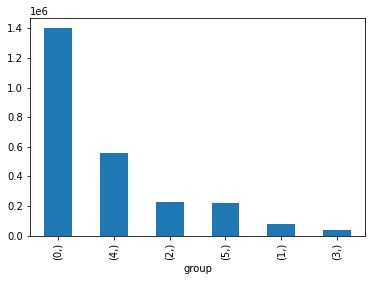

In [170]:
df_group.plot(kind='bar', x=)

In [171]:
df_group_not_0 = df.loc[df['group'].isin([1,2,3,4,5])]

In [172]:
df_group_not_0.shape

(1118674, 39)

In [183]:
df_point = df_group_not_0[['point_lat', 'point_lon']].value_counts()

In [184]:
df_point.head()

point_lat  point_lon
48.6321    44.4407      30751
48.8286    44.7603      24512
50.0734    45.3934      21342
48.707103  44.516939     5276
48.7071    44.5169       4364
dtype: int64

In [185]:
df_def_point = df[(df['point_lat']=='48.6321') & (df['point_lon']=='44.4407')]

In [186]:
df_def_point

,cdPn,hrId,type,ierId,level,point,state,action,cardId,isNear,region,ierType,cityCode,isDanger,isDangerB,regionId,cityFiasId,isBlocking,isMalicius,lostNumber,membership,streetCode,timeIsoStr,isChemFlood,dispatchesId,districtCode,streetFiasId,clarification,injuredNumber,responseStatus,actionTimeIsoStr,assignTimeIsoStr,Год,Месяц,День,EHM,group,point_lat,point_lon
123,[NULL],янв24_Оказани_109,Оказание медицинской помощи,[NULL],Обычный,"[{""lat"": 48.6321, ""lon"": 44.4407}]",Карточка закрыта,[NULL],24a95626-252b-4d32-be42-ab4c00874c14,[NULL],Волгоград Краснооктябрьский,[NULL],[NULL],[NULL],false,50,[NULL],false,[NULL],0,Скорая: Подстанция Краснооктябрьский р-н¶ ...,[NULL],2020-01-24T08:12:36.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],2020-01-24T08:13:00.000,2020,1,24,0,4,48.6321,44.4407
427,[NULL],фев14_Оказани_501,Оказание медицинской помощи,[NULL],Обычный,"[{""lat"": 48.6321, ""lon"": 44.4407}]",Карточка закрыта,[NULL],6fc9c86a-8710-4478-934d-ab61016ef8ad,[NULL],Волгоград Кировский,[NULL],[NULL],[NULL],false,42,[NULL],false,[NULL],0,Скорая: Подстанция Кировский р-н ...,[NULL],2020-02-14T22:16:06.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],2020-02-14T22:16:11.000,2020,2,14,0,4,48.6321,44.4407
451,[NULL],фев14_Оказани_509,Оказание медицинской помощи,[NULL],Обычный,"[{""lat"": 48.6321, ""lon"": 44.4407}]",Карточка закрыта,[NULL],9cd6971e-b295-496d-9ebb-ab610170eca8,[NULL],Волгоград Краснооктябрьский,[NULL],[NULL],[NULL],false,50,[NULL],false,[NULL],0,Скорая: Подстанция Тракторозаводский р-н ...,[NULL],2020-02-14T22:23:12.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],2020-02-14T22:23:16.000,2020,2,14,0,4,48.6321,44.4407
667,[NULL],янв23_Оказани_051,Оказание медицинской помощи,[NULL],Обычный,"[{""lat"": 48.6321, ""lon"": 44.4407}]",Карточка закрыта,[NULL],2ac5bc68-27d0-4d36-8536-ab4b00447e97,[NULL],Волгоград Советский,[NULL],[NULL],[NULL],false,52,[NULL],false,[NULL],0,Скорая: Подстанция Советский р-н ...,[NULL],2020-01-23T04:09:22.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],2020-01-23T04:11:15.000,2020,1,23,0,4,48.6321,44.4407
1075,[NULL],фев15_Оказани_040,Оказание медицинской помощи,[NULL],Обычный,"[{""lat"": 48.6321, ""lon"": 44.4407}]",Карточка закрыта,[NULL],908478eb-ee2d-441b-a28d-ab62002693b0,[NULL],Волгоград Советский,[NULL],[NULL],[NULL],false,52,[NULL],false,[NULL],0,Скорая: Подстанция Ворошиловский р-н ...,[NULL],2020-02-15T02:20:27.000,false,[NULL],[NULL],[NULL],[NULL],0,200,[NULL],2020-02-15T02:20:41.000,2020,2,15,0,4,48.6321,44.4407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516982,,EHM1_дек18_ДТП_022,ДТП,,Обычный,"[{""lat"": 48.6321, ""lon"": 44.4407}]",Карточка закрыта,,9b732eba-9391-451e-9f51-ab2700bf396b,,Волгоград Тракторозаводский,,,,false,16,,false,,0,Полиция: ОП №1 Тракторозаводский р-н ...,,2019-12-18T11:36:13.000,false,,,,,0,200.0,,2019-12-18T11:37:08.000,2019,12,18,2,1,48.6321,44.4407
2517570,,EHM1_дек12_ВскрДвер_008,Вскрытие дверей,,Обычный,"[{""lat"": 48.6321, ""lon"": 44.4407}]",Карточка закрыта,,d9c6ec67-fd38-4633-bac3-ab21015f86ad,,Волгоград Краснооктябрьский,,,,false,50,,false,,0,"Скорая: Подстанция Краснооктябрьский р-н¶, Пол...",,2019-12-12T21:19:52.000,false,,,,,0,200.0,,2019-12-12T21:20:28.000,2019,12,12,2,5,48.6321,44.4407
2517670,,EHM1_дек18_Правонар_032,Правонарушение,,Обычный,"[{""lat"": 48.6321, ""lon"": 44.4407}]",Все реагирования завершены,,4399bdd2-c4e8-4be1-a3a8-ab27009502f0,,Волгоград Ворошиловский,,,,false,10,,false,,0,Полиция: ОП №5 Ворошиловский р-н¶ ...,,2019-12-18T09:02:32.000,false,,,,,0,200.0,,2019-12-18T09:03:36.000,2019,12,18,2,5,48.6321,44.4407
2517700,,EHM1_дек19_Оказани_046,Оказание медицинской помощи,,Обычный,"[{""lat"": 48.6321, ""lon"": 44.4407}]",Карточка закрыта,,cd910e9c-0fc5-4462-acf9-ab280035df7e,,Волгоград Красноармейский,,,,false,53,,false,,0,Скорая: Подстанция Красноармейский р-н ...,,2019-12-19T03:16:08.000,false,,,,,0,200.

In [187]:
df_def_point_group = df_def_point[['group']].value_counts()

In [188]:
df_def_point_group

group
4        14816
5         5957
0         5773
2         5117
1         3004
3         1857
dtype: int64

Очевидно, местоположение с координатами 48.6321,44.4407 является самым ЧС-ным. За 3 года с 2019 года с него было 14816 только по ЧС, связанных со здоровьем. Что это за место? 

In [189]:
geolocator = Nominatim(user_agent="geoapiExercises")

Latitude = '48.6321'
Longitude = '44.4407'
 
location = geolocator.geocode(Latitude+","+Longitude)
print(f"Адрес: {location}")

Адрес: 1Б, Самарская улица, Кировский район, Волгоград, городской округ Волгоград, Волгоградская область, Южный федеральный округ, 400062, Россия


In [ ]:
Похоже, рядом с этим местом завод цветных металлов. Аналогично можно поискать и следующие места.

На этом завершаем исследование, на самом интересном месте. "За бортом" осталось, например, рассмотрение появления вызовов во времени, но на это уже не хватает времени... (Каламбур)